In [10]:
import sys
import os

# Add the path to `database_scripts` folder
sys.path.append(os.path.abspath("../database_scripts"))
import  db_utils as du
import create_tables as ct
gdf_bezirke = du.get_geo()

In [11]:
from shapely import Point
import geopandas as gpd
import pandas as pd

excel_file_path = '../data/raw/Fahrrad/gesamtdatei-stundenwerte.xlsx'


df_zaehlstellen = pd.read_excel(excel_file_path, sheet_name = 'Standortdaten')

df_zaehlstellen.columns = ['Zählstelle', 'Beschreibung', 'Breitengrad', 'Längengrad', 'Installationsdatum']

# Create GeoDataFrame for Zählstellen
geometry = [Point(xy) for xy in zip(df_zaehlstellen["Längengrad"], df_zaehlstellen["Breitengrad"])]
gdf_zaehlstellen = gpd.GeoDataFrame(df_zaehlstellen, geometry=geometry, crs="EPSG:4326")

# Spatial join: Match Zählstellen with Bezirke
gdf_zaehlstellen = gpd.sjoin(gdf_zaehlstellen, gdf_bezirke, how="left", predicate="within")
 

In [12]:
gdf_zaehlstellen

,Zählstelle,Beschreibung,Breitengrad_left,Längengrad_left,Installationsdatum,geometry,name,element,id,Breitengrad_right,Längengrad_right
0,12-PA-SCH,Schwedter Steg,52.549071,13.400367,2012-03-01,POINT (13.40037 52.54907),Pankow,relation,164723,6.908842e+06,1.496162e+06
1,02-MI-JAN-N,Jannowitzbrücke Nord,52.513932,13.417835,2015-04-01,POINT (13.41783 52.51393),Mitte,relation,16347,6.897058e+06,1.487886e+06
2,02-MI-JAN-S,Jannowitzbrücke Süd,52.513943,13.417611,2015-04-01,POINT (13.41761 52.51394),Mitte,relation,16347,6.897058e+06,1.487886e+06
3,13-CW-PRI,Prinzregentenstraße,52.488136,13.333120,2015-04-01,POINT (13.33312 52.48814),Charlottenburg-Wilmersdorf,relation,404538,6.891236e+06,1.477236e+06
4,18-TS-YOR-O,Yorckstraße Ost,52.491938,13.373472,2015-04-01,POINT (13.37347 52.49194),Tempelhof-Schöneberg,relation,158437,6.880291e+06,1.489535e+06
5,18-TS-YOR-W,Yorkstraße West,52.492280,13.373210,2015-04-01,POINT (13.37321 52.49228),Tempelhof-Schöneberg,relation,158437,6.880291e+06,1.489535e+06
6,19-TS-MON,Monumentenstraße,52.488117,13.369785,2015-05-01,POINT (13.36978 52.48812),Tempelhof-Schöneberg,relation,158437,6.880291e+06,1.489535e+06
7,27-RE-MAR,Markstraße,52.558190,13.364944,2015-05-01,POINT (13.36494 52.55819),Mitte,relation,16347,6.897058e+06,1.487886e+06
8,03-MI-SAN-O,Invalidenstraße Ost,52.527177,13.372016,2015-06-01,POINT (13.37202 52.52718),Mitte,relation,16347,6.897058e+06,1.487886e+06
9,03-MI-SAN-W,Invalidenstraße West,52.527686,13.373105,2015-06-01,POINT (13.3731 52.52769),Mitte,relation,16347,6.897058e+06,1.487886e+06


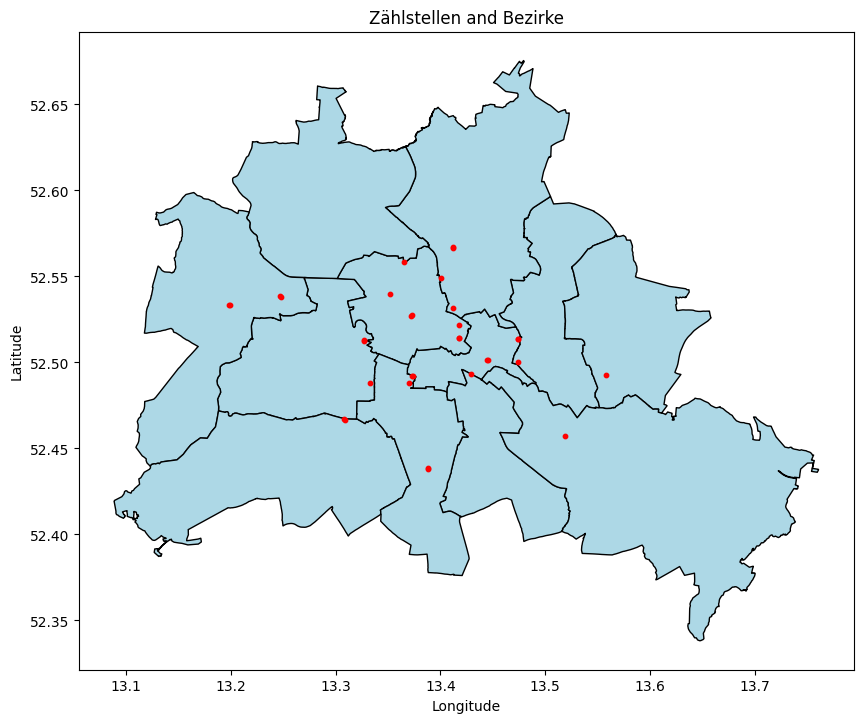

In [6]:
import matplotlib.pyplot as plt

ax = gdf_bezirke.plot(color="lightblue", edgecolor="black", figsize=(10, 10))
gdf_zaehlstellen.plot(ax=ax, color="red", markersize=10)
plt.title("Zählstellen and Bezirke")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
print(gdf_bezirke.columns)

In [14]:
from shapely import Point
import geopandas as gpd
import pandas as pd

excel_file_path = '../data/processed/Tableau Standort PKW.xlsx'


df_mq = pd.read_excel(excel_file_path)

# Create GeoDataFrame for Zählstellen
geometry = [Point(xy) for xy in zip(df_mq["LÄNGENGRAD"], df_mq["BREITENGRAD"])]
gdf_mq = gpd.GeoDataFrame(df_mq, geometry=geometry, crs="EPSG:4326")

# Spatial join: Match Zählstellen with Bezirke
gdf_mq = gpd.sjoin(gdf_mq, gdf_bezirke, how="left", predicate="within")

In [15]:
gdf_mq

,MQ_KURZNAME,LÄNGENGRAD,BREITENGRAD,Anzahl Zählungen,geometry,name,element,id,Breitengrad,Längengrad
0,TE001,13.192578,52.433868,37243,POINT (13.19258 52.43387),Steglitz-Zehlendorf,relation,55734,6.879139e+06,1.473769e+06
1,TE002,13.192747,52.433813,37832,POINT (13.19275 52.43381),Steglitz-Zehlendorf,relation,55734,6.879139e+06,1.473769e+06
2,TE004,13.261301,52.436642,41596,POINT (13.2613 52.43664),Steglitz-Zehlendorf,relation,55734,6.879139e+06,1.473769e+06
3,TE005,13.263106,52.435112,44449,POINT (13.26311 52.43511),Steglitz-Zehlendorf,relation,55734,6.879139e+06,1.473769e+06
4,TE006,13.259881,52.433741,37543,POINT (13.25988 52.43374),Steglitz-Zehlendorf,relation,55734,6.879139e+06,1.473769e+06
...,...,...,...,...,...,...,...,...,...,...
271,TE581,13.385776,52.467462,24458,POINT (13.38578 52.46746),Tempelhof-Schöneberg,relation,158437,6.880291e+06,1.489535e+06
272,TE582,13.383970,52.457794,23455,POINT (13.38397 52.45779),Tempelhof-Schöneberg,relation,158437,6.880291e+06,1.489535e+06
273,TE583,13.384196,52.457440,24564,POINT (13.3842 52.45744),Tempelhof-Schöneberg,relation,158437,6.880291e+06,1.489535e+06
274,TE592,13.301719,52.509232,23022,POINT (13.30172 52.50923),Charlottenburg-Wilmersdorf,relation,404538,6.891236e+06,1.477236e+06


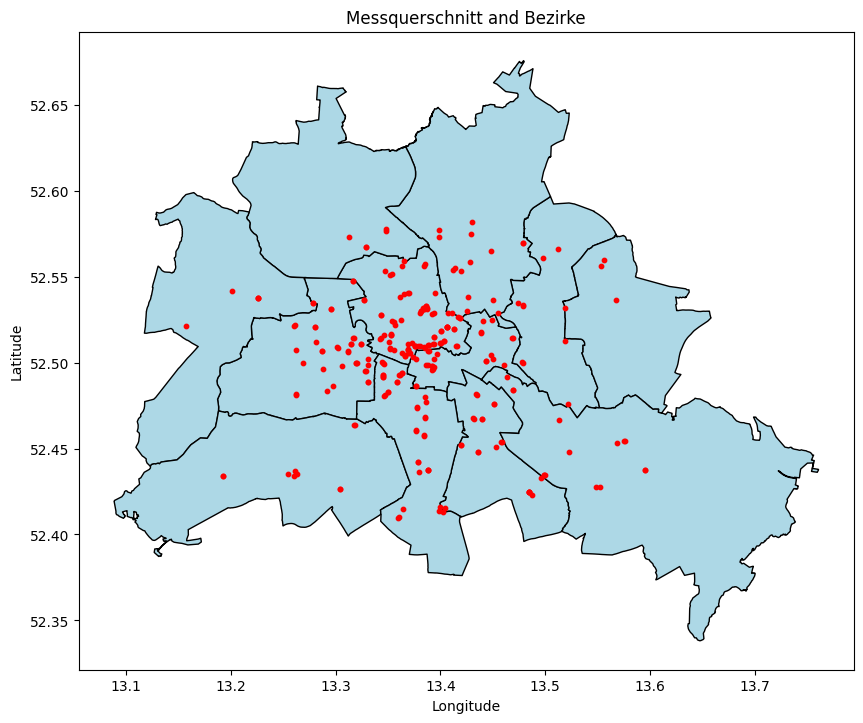

In [16]:
import matplotlib.pyplot as plt

ax = gdf_bezirke.plot(color="lightblue", edgecolor="black", figsize=(10, 10))
gdf_mq.plot(ax=ax, color="red", markersize=10)
plt.title("Messquerschnitt and Bezirke")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [5]:

import folium
from shapely.geometry import mapping

# Create a folium map centered on Berlin
m = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Add Bezirke polygons
for _, row in gdf_bezirke.iterrows():
    folium.GeoJson(
        mapping(row['geometry']),
        name=row['element'],
        tooltip=folium.Tooltip(f"Bezirk: {row['element']}"),
    ).add_to(m)

# Add Zählstellen points
for _, row in gdf_zaehlstellen.iterrows():
    folium.Marker(
        location=[row['Breitengrad'], row['Längengrad']],
        tooltip=f"Zählstelle: {row['Zählstelle']}\nBeschreibung: {row['Beschreibung']}"
    ).add_to(m)

# Save to an HTML file or display in Jupyter Notebook
m.save("berlin_interactive_map.html")
m


KeyError: 'Breitengrad'